# Heart Disease UCI¶
 ## Acknowledgements Creators:


Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D. Donor: David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

Link https://www.kaggle.com/ronitf/heart-disease-uci


##Attribute Information:


>age: The person's age in years

>sex: The person's sex (1 = male, 0 = female)

>cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

>trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

>chol: The person's cholesterol measurement in mg/dl
>fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

>restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

>thalach: The person's maximum heart rate achieved

>exang: Exercise induced angina (1 = yes; 0 = no)

>oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

>slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

>ca: The number of major vessels (0-3)

>thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

>target: Heart disease (0 = no, 1 = yes)



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
heart_disease = pd.read_csv('heart_disease.csv')

In [22]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
thal_values = heart_disease['thal'].unique()
slope_values = heart_disease['slope'].unique()
restecg_values = heart_disease['restecg'].unique()
cpain_values = heart_disease['cp'].unique()

# Findings for data cleaning:

From these initial tables, we found that some of the data had been inputted differently from what was written in the documentation, thus we clarified the values for certain attributes below:

- Thal: 1= Normal, 2 = Fixed defect and 3 = Reversible defect. Given that in the documentation, the values 3,6,7 where used to denote normal, fixed defect and reversible defect respectively, we had to clean up the data and assing one of the values (1,2,3) to the values on 0 in this column. 
- Slope: 0=upsloping,1=downsloping,2=flat
- Restecg: 0 = normal, 1=having ST abnormality, 2=showing ventricular hypertrophy


In [26]:
#dont run cell to keep as reference
heart_disease[heart_disease['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [27]:
thal_values

array([1, 2, 3, 0])

In [28]:
heart_disease.pivot_table(values='target',index='thal',aggfunc='count')

,target
thal,
0,2
1,18
2,166
3,117


Given that 2 (Fixed Defect) was the most common value for the thal attribute, we decided to give this value to the 2 samples with a missing value for thal.

In [29]:
heart_disease.loc[heart_disease['thal']==0,'thal']=2

In [30]:
heart_disease.pivot_table(values='target',index='thal',aggfunc='count')

,target
thal,
1,18
2,168
3,117


# Tabular Analysis

In [31]:
hd_y = heart_disease[heart_disease['target']==1]
hd_y.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
hd_y.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.133333,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.435237,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


People with heart disease have a slightly lower mean age, and this will be more noticeable with our visualizations below. Most of the comparisons between patients with heart disease and patients without becomes more evident later in this analysis.


In [33]:
heart_disease.pivot_table(values='age',index='target',columns='exang',aggfunc=['mean','count'])

mean            count    
exang           0          1     0   1
target                                
0       57.048387  56.236842    62  76
1       52.316901  53.608696   142  23

It is curious to see that the average age for people who experienced exercise induced agnia but did not suffer from heart disease is higher than for those who did suffer from heart disease. It is also interesting to see how a majority of the people that did not experience exercise induced agnia do suffer from heart disease.

# Data Visualization

In [34]:
hr_v = heart_disease[['thalach','exang','oldpeak','slope','thal','target','age','sex','trestbps','chol']]

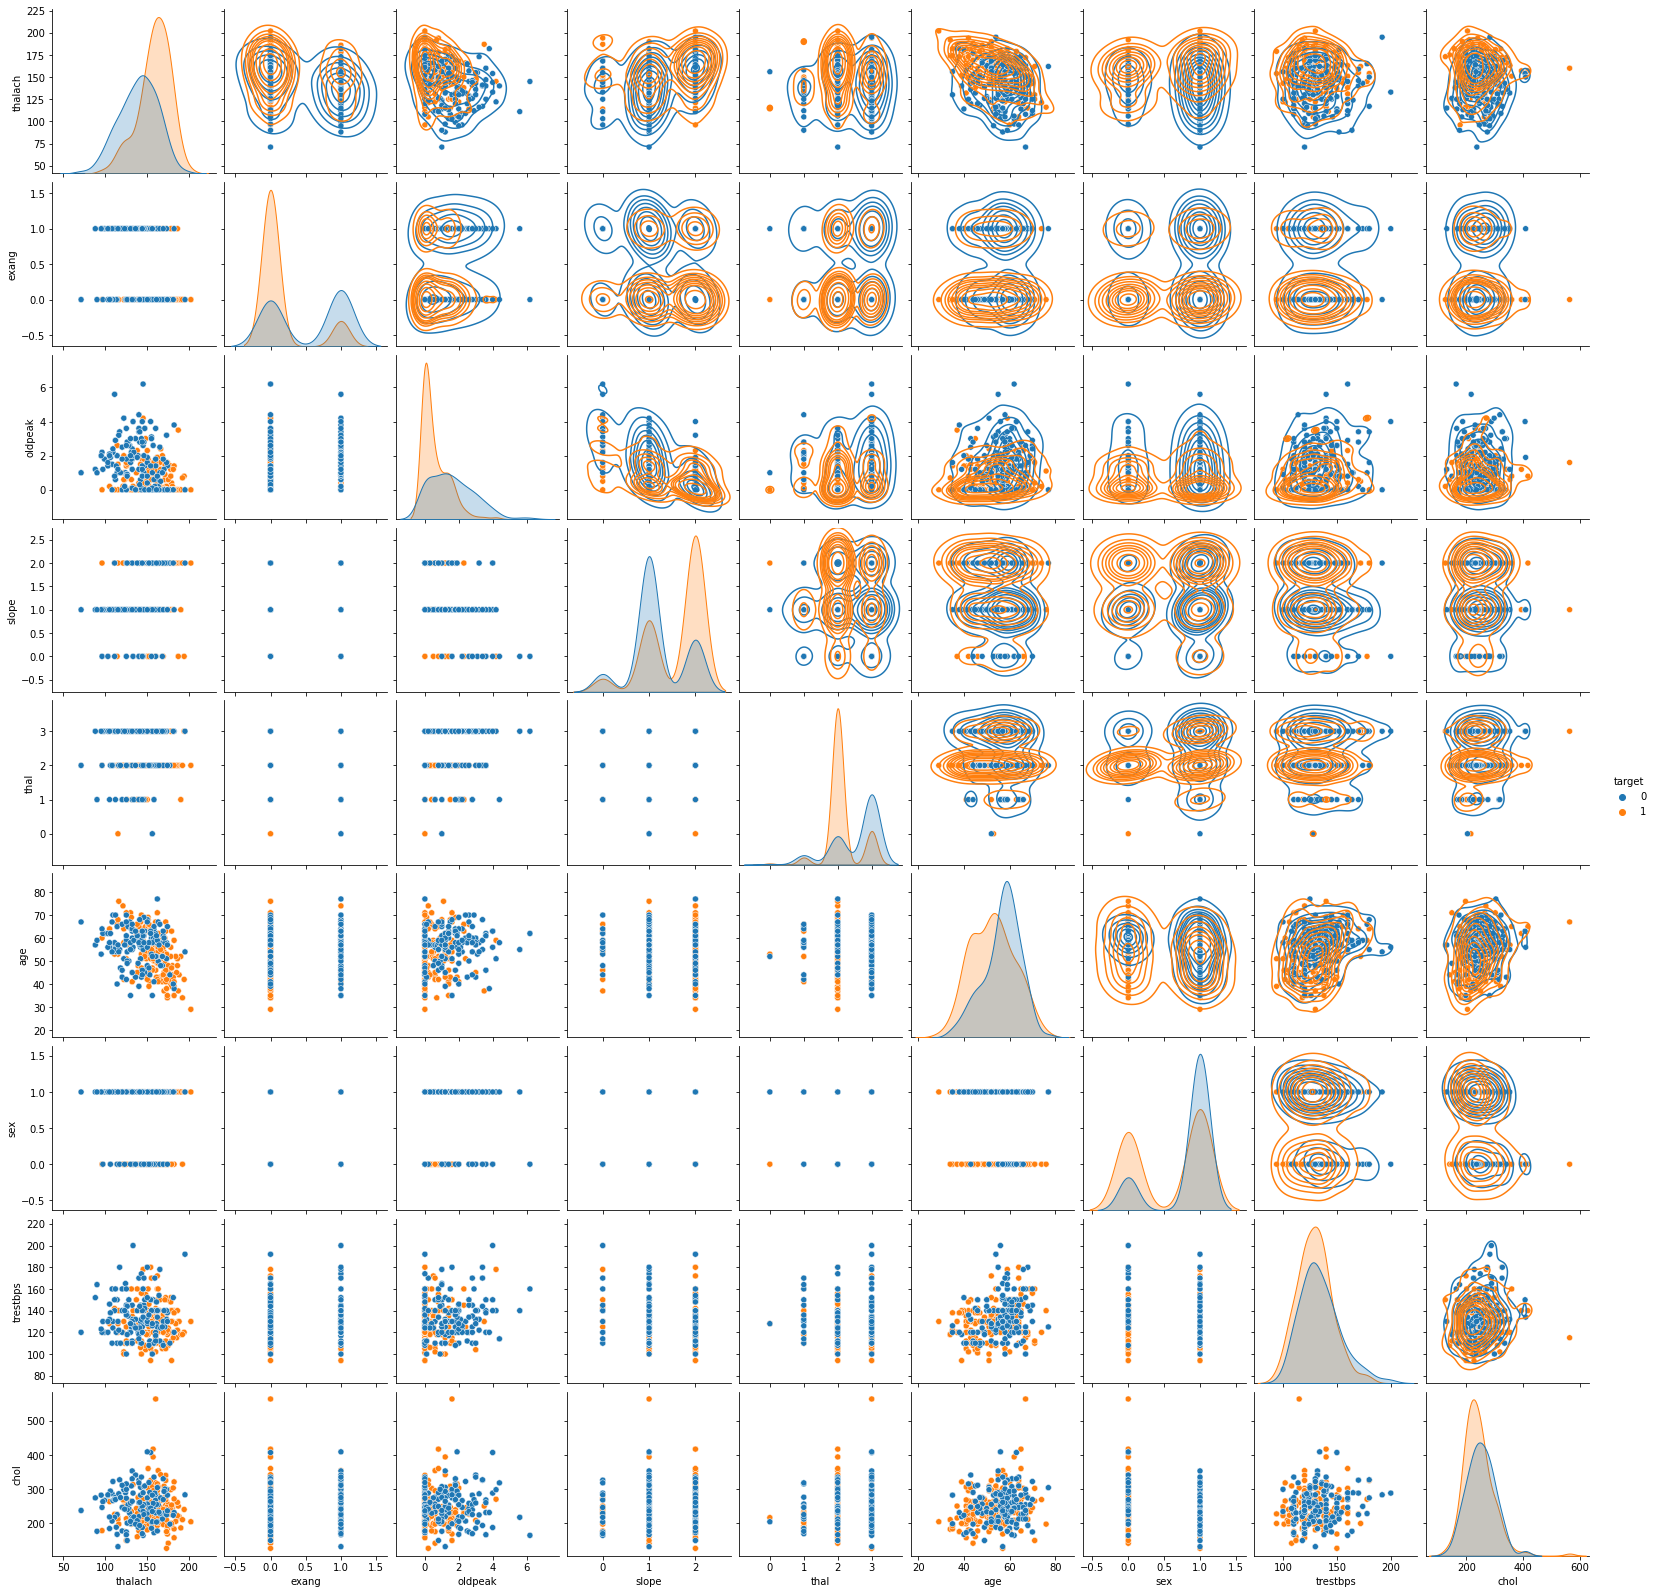

In [7]:
g2 = sns.pairplot(hr_v,hue='target')
g2.map_upper(sns.kdeplot)
g2.map_lower(sns.scatterplot)

Using this pairplot, we could get a better sense of the relationship between the attributes in the dataset we were studying. Two graphs that caught our eye were the distribution of thal being very high for 2 (Fixed Defect) in the population that suffered heart disease. Furthermore, patients with heart disease where more likely to have higher maximum heart rates, although interestingly exercise induced agnia was lower in patients with heart disease.

Patients with heart disease also tend to have lower old peaks, meaning there was a smaller ST depression from exercise relative to rest.

## Analysis of Correlation between Attributes

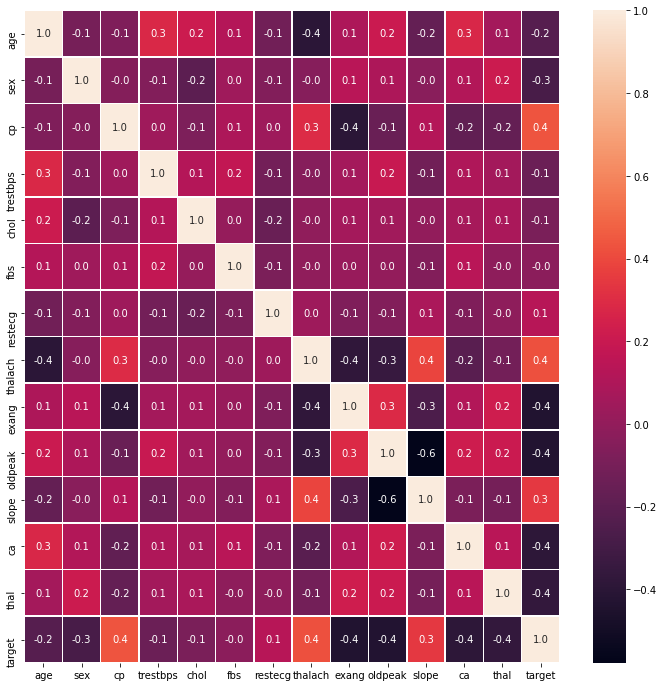

In [35]:
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(heart_disease.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()


We can see from this analysis that the attributes most positively correlated to the prevalence of heart disease are chest pain type and maximum heart rate achieved, while exercise induced agnia, old peak and the number of major blood vessels colored by fluorosopy.

## Age and sex analysis



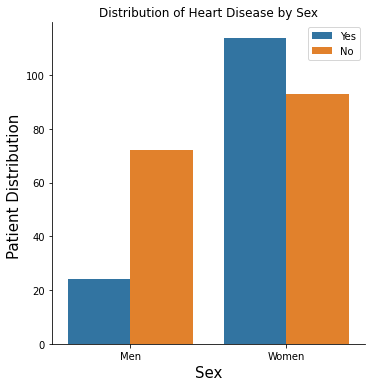

In [54]:
#fig, ax = plt.subplots(1,2)

sns.catplot(x='sex',kind='count',data=heart_disease,hue='target',legend=False)

plt.xticks([0,1],['Men','Women'])
plt.legend(['Yes','No']);
plt.title('Distribution of Heart Disease by Sex')
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Patient Distribution ',fontsize=15)
plt.show();

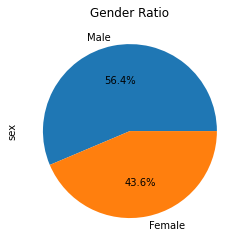

In [37]:
hd_y.sex.value_counts().plot(kind='pie', labels={'Female', 'Male'}, autopct='%1.1f%%');
plt.title('Gender Ratio');

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Age amongst patients with Heart Disease')

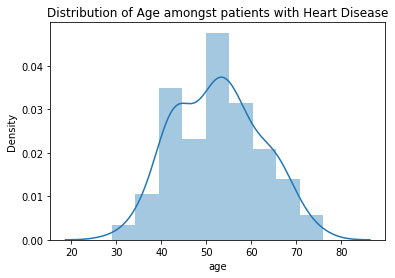

In [39]:
sns.distplot(hd_y['age']);
plt.title('Distribution of Age amongst patients with Heart Disease')

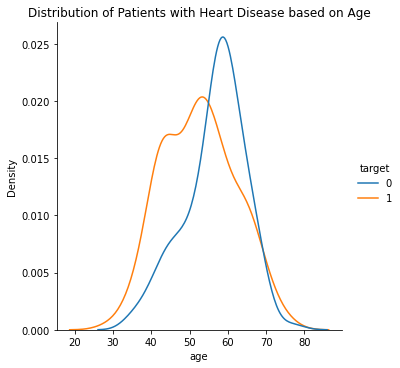

In [ ]:
g3 = sns.displot(data=heart_disease,x='age',hue='target',kind='kde')
g3.set(title='Distribution of Patients with Heart Disease based on Age')

We can see in this graph that on average, patients in this dataset who suffered from heart disease tend to be younger than patients who don't.


We could observe from our graphical analysis that females tend to have a higher probability of suffering from heart disease, based on our data. We also see that the majority of the population with heart disease is aged between 50 - 58 years.


## Maximum Heart Rate and Age analysis


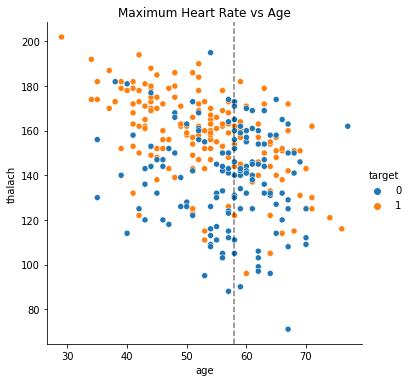

In [40]:
g1 = sns.relplot(data=heart_disease,x='age',y='thalach',hue='target')
plt.axvline(58, color="k", linestyle="--", alpha=0.5);
g1.set(title='Maximum Heart Rate vs Age')

On average, patients with heart disease reached higher maximum heart rates, than those patients with no heart disease.

## Resting Blood Sugar Levels and Cholesterol Analysis

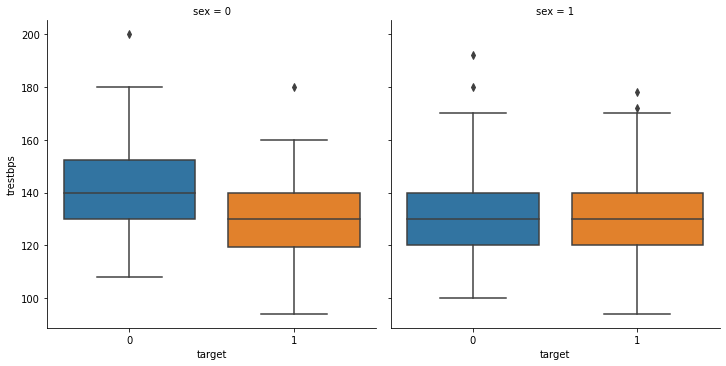

In [41]:
sns.catplot(y='trestbps',x='target',kind='box',data=heart_disease,col='sex');

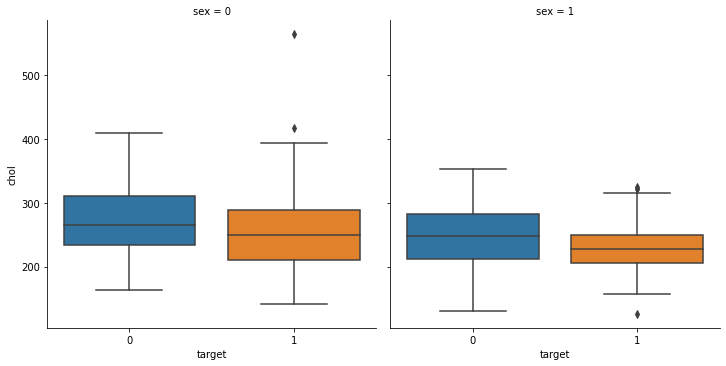

In [42]:
sns.catplot(y='chol',x='target',kind='box',data=heart_disease,col='sex');

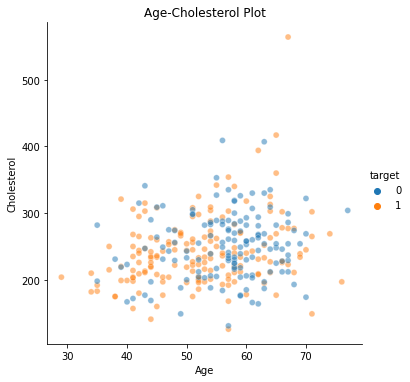

In [43]:
sns.relplot(kind = 'scatter',x = 'age', y = 'chol',alpha = 0.5, color = 'red',data=heart_disease,hue='target')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot');

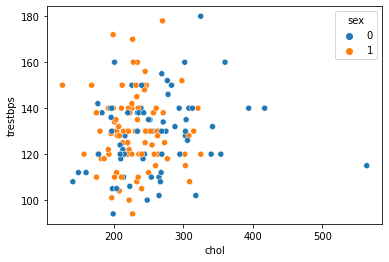

In [44]:
sns.scatterplot(y='trestbps', x="chol", hue="sex", data=hd_y);

Relationship between Cholesterol and Resting Blood Sugar levels.

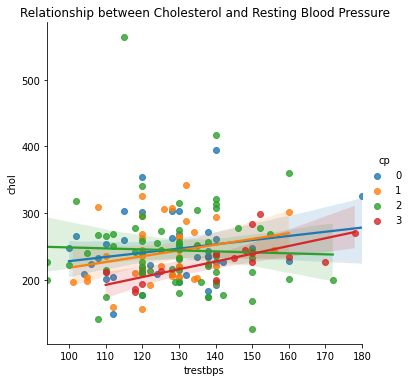

In [49]:
sns.lmplot(x="trestbps", y="chol",data=hd_y,hue="cp")
plt.title('Relationship between Cholesterol and Resting Blood Pressure')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Chest Pain Types')

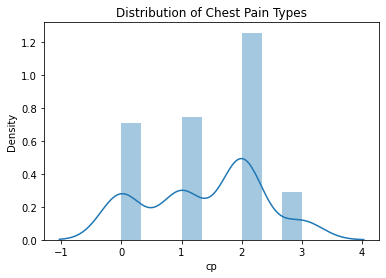

In [48]:
sns.distplot(hd_y['cp']);
plt.title('Distribution of Chest Pain Types')

There is a positive correlation between cholesterol levels and resting blood sugar levels, and we found that on average patients with higher cholesterol and BSP levels were more likely to experience chest pain type 3 (asymptomatic agnia).
We can also point out that a majority of patients who suffered from heart disease had chest pain type 2 (non-anginal pain).

## Old Peak and Slope Analysis

Text(0.5, 1.05, 'Depression in ST Segment by Target Variable')

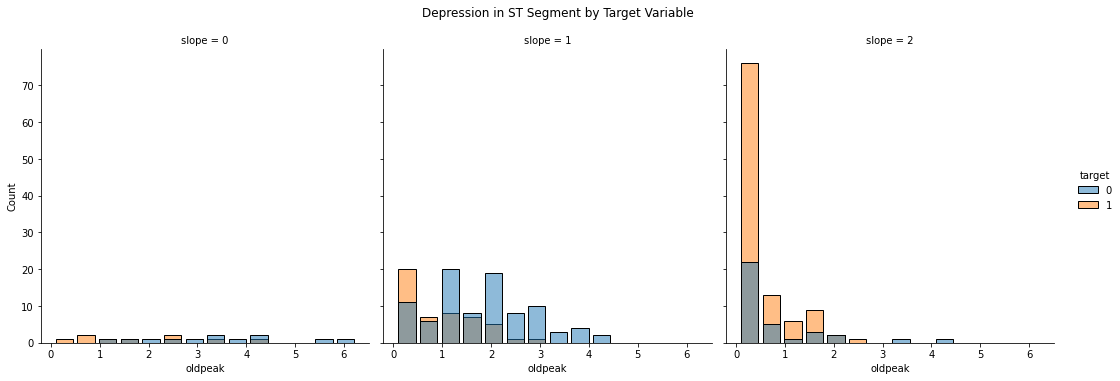

In [ ]:
g4 = sns.displot(data=heart_disease,x='oldpeak',shrink=0.8,col='slope',hue='target')
plt.suptitle('Depression in ST Segment by Target Variable',y=1.05)

ALthough most patients in the dataset showed a flat slope of peak exercise ST segment, there was an ample majority of patients who suffered from heart disease with lower oldpeaks, showing that this group did not present a big difference in ST segment with exercise relative to rest.
